# Results

This Notebook evaluates the results of of the YOLO, TrackNet and CV models

### imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

### plot style

In [2]:
# Define D3 Category 10 colors
d3_colors = [
    '#1f77b4',  # Blue
    '#ff7f0e',  # Orange
    '#2ca02c',  # Green
    '#d62728',  # Red
    '#9467bd',  # Purple
    '#8c564b',  # Brown
    '#e377c2',  # Pink
    '#7f7f7f',  # Gray
    '#bcbd22',  # Yellow-Green
    '#17becf'   # Cyan
]

# Set D3 colors as the default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=d3_colors)


def set_plot_style_default():
    # General font settings
    plt.rcParams['font.family'] = 'Sans Serif'      # Use Ariel like overleaf
    plt.rcParams['font.size'] = 12             # Base font size for readability
    plt.rcParams['axes.titlesize'] = 14        # Larger title font size
    plt.rcParams['axes.labelsize'] = 12        # Label font size
    plt.rcParams['xtick.labelsize'] = 10       # X-tick font size
    plt.rcParams['ytick.labelsize'] = 10       # Y-tick font size
    plt.rcParams['legend.fontsize'] = 10       # Legend font size
    
    # Line and marker settings
    plt.rcParams['lines.linewidth'] = 1.5      # Make lines thicker for better visibility
    plt.rcParams['lines.markersize'] = 6       # Standard marker size
    
    # Axes and grid settings
    plt.rcParams['axes.grid'] = True           # Enable grid
    plt.rcParams['grid.linestyle'] = '--'      # Use dashed line for grid
    plt.rcParams['grid.alpha'] = 0.7           # Grid transparency
    plt.rcParams['axes.edgecolor'] = 'black'   # Black border around plot area
    plt.rcParams['axes.linewidth'] = 1         # Border line thickness

    # Ensure grid is below the plot elements
    plt.rcParams['axes.axisbelow'] = True          # Grid lines below plot elements

    # Legend settings
    plt.rcParams['legend.frameon'] = True      # Frame around the legend
    plt.rcParams['legend.framealpha'] = 0.9    # Slightly transparent legend background
    plt.rcParams['legend.loc'] = 'best'        # Automatically place legend in the best location

    # Tick direction
    plt.rcParams['xtick.direction'] = 'in'     # Inward tick direction for x-axis
    plt.rcParams['ytick.direction'] = 'in'     # Inward tick direction for y-axis


### load data

In [19]:
results_cv = pd.read_csv('test_results_CV.csv')
results_TN = pd.read_csv('test_results_TN.csv')
results_YOLO = pd.read_csv('test_results_YOLO.csv')

# combine the results
results = pd.concat([results_cv, results_TN, results_YOLO]).reset_index(drop=True)

# drop column Visibility_None if exists
if 'Visibility_None' in results.columns:
    results = results.drop(columns=['Visibility_None'])

results

,Model,F1 Dataset New,F1 Dataset TrackNet,F1-Score Total,F1 Visibility Blurry,F1 Visibility Difficult,F1 Visibility Occluded,F1 Visibility Visibile,PE Mean,PE Mean Below Threshold,PE Counts,Precision Total,Recall Total,FPS
0,Benchmark_Loose,0.604900,0.881579,0.718665,0.857143,0.472103,0.166667,0.854118,83.263926,0.769343,[ 0 679 205 49 13 8 29 1270],0.770048,0.673711,70.220533
1,Benchmark_Strict,0.355216,0.617986,0.452199,0.428571,0.217391,0.068966,0.541387,83.263926,0.769343,[ 0 679 205 49 13 8 29 1270],0.340307,0.673711,70.220533
2,TrackNet 3-in-3-out aug-True,0.900658,0.960961,0.921673,0.990826,0.769441,0.755556,0.962884,3.042070,0.684447,"[0, 975, 1063, 110, 21, 11, 15, 60]",0.942683,0.901578,330.915950
3,TrackNet 3-in-3-out aug-False,0.878278,0.960914,0.907603,0.921569,0.722380,0.727273,0.954849,3.087418,0.657174,"[0, 980, 1010, 93, 22, 9, 33, 91]",0.923313,0.892418,324.674231
4,TrackNet 3-in-1-out aug-True,0.891494,0.954768,0.913890,0.942308,0.734923,0.600000,0.955407,3.351784,0.662389,"[0, 985, 1014, 80, 33, 13, 14, 72]",0.946661,0.883312,135.161485
5,TrackNet 3-in-1-out aug-False,0.854527,0.923845,0.878928,0.865979,0.685131,0.634146,0.932897,2.883454,0.629702,"[0, 948, 959, 73, 20, 16, 32, 109]",0.901713,0.857265,136.058206
6,TrackNet 5-in-3-out aug-True,0.867462,0.944513,0.894102,0.932039,0.727786,0.634146,0.946121,5.434755,0.798676,"[0, 776, 1127, 131, 41, 26, 20, 95]",0.905800,0.882703,311.834388
7,TrackNet 5-in-3-out aug-False,0.896712,0.955206,0.917113,0.962264,0.736695,0.697674,0.961232,2.007926,0.654637,"[0, 989, 1039, 91, 20, 16, 10, 62]",0.946089,0.889859,304.730405
8,TrackNet 5-in-5-out aug-True,0.913855,0.954016,0.926477,0.981481,0.797333,0.808511,0.959021,3.420916,0.693266,"[0, 949, 1098, 99, 27, 8, 12, 56]",0.957400,0.897489,448.019195
9,TrackNet 5-in-5-out aug-False,0.893198,0.960241,0.915556,0.971963,0.764384,0.727273,0.960956,2.079026,0.705929,"[0, 940, 1066, 124, 26, 16, 34, 60]",0.928326,0.903132,419.539229


## Generate Result Table

In [21]:
# split into two df with unique columns
column_names_1= [
    "Model",
    "F1-Score Total",
    "PE Mean",
    "PE Mean Below Threshold",
    "Precision Total",
    "Recall Total",
    "FPS"
]

column_names_2 = [
    "Model",
    "F1 Dataset New",
    "F1 Dataset TrackNet",
    "F1 Visibility Blurry",
    "F1 Visibility Difficult",
    "F1 Visibility Occluded",
    "F1 Visibility Visibile",
]

results_1 = results[column_names_1]
results_2 = results[column_names_2]

# create latex table
with open('results_general.tex', 'w') as f:
    f.write(results_1.to_latex(index=False,  
    longtable=False,  
    escape=True,  
    float_format="%.4f"  ))

with open('results_F1.tex', 'w') as f:
    f.write(results_2.to_latex(index=False,  
    longtable=False,  
    escape=True,  
    float_format="%.4f"  ))

C:\Users\benev\AppData\Local\Temp\ipykernel_15340\2205361400.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(results_1.to_latex(index=False,
C:\Users\benev\AppData\Local\Temp\ipykernel_15340\2205361400.py:33: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(results_2.to_latex(index=False,


## Plot Results

### total f1

C:\Users\benev\AppData\Local\Temp\ipykernel_15340\2714345071.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results.groupby('Model').mean()['F1-Score Total'].plot(kind='bar', ax=ax)


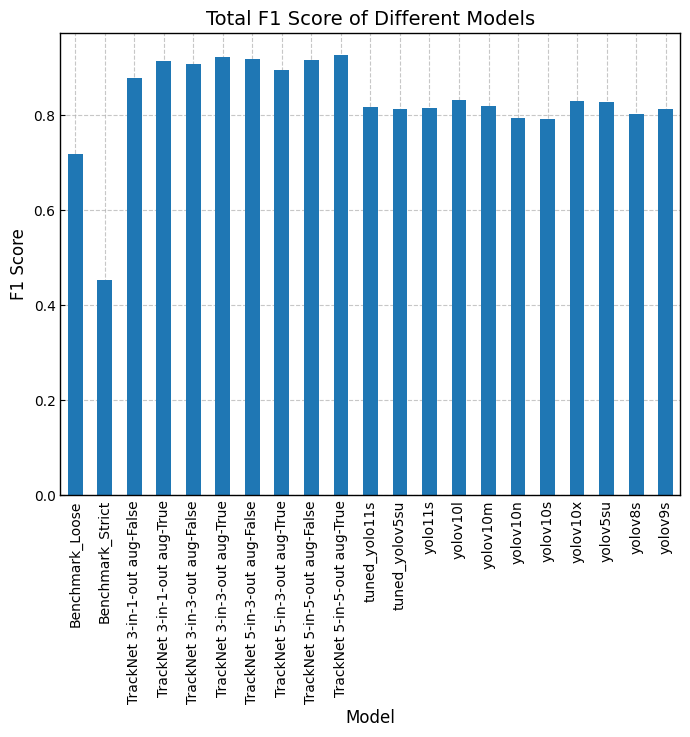

In [6]:
# plot the total f1 score
set_plot_style_default()

fig, ax = plt.subplots(figsize=(8, 6))

# Plot the total f1 score
results.groupby('Model').mean()['F1-Score Total'].plot(kind='bar', ax=ax)

# Set the title and labels
ax.set_title('Total F1 Score of Different Models')
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')

# Show the plot
plt.show()

### Filter for a selection of Models

In [7]:
# filter for only selected models
selected_models = ["Benchmark_Strict", "TrackNet 3-in-3-out aug-True", "TrackNet 3-in-3-out aug-False","TrackNet 3-in-1-out aug-True", "TrackNet 5-in-5-out aug-True", "yolov5su", "yolo11s", "yolov10x"]
results_selected = results[results['Model'].isin(selected_models)]

# rename the models
results_selected['Model'] = results_selected['Model'].replace({
    'Benchmark_Strict': 'Benchmark',
    'TrackNet 3-in-3-out aug-True': 'TN 3-in-3-out aug',
    'TrackNet 3-in-3-out aug-False': 'TN 3-in-3-out',
    'TrackNet 3-in-1-out aug-True': 'TN 3-in-1-out aug',
    'TrackNet 5-in-5-out aug-True': 'TN 5-in-5-out aug',
    'yolov5su': 'YOLO v5 s',
    'yolo11s': 'YOLO v11 s',
    'yolov10x': 'YOLOv v10 x'
})

C:\Users\benev\AppData\Local\Temp\ipykernel_15340\1313506435.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_selected['Model'] = results_selected['Model'].replace({


### Positioning Error

In [8]:
#get columns model and pe counts
PE_bins = results_selected[['Model', 'PE Counts']]

PE_bins['PE Counts'] = PE_bins['PE Counts'].apply(
    lambda x: list(map(int, re.findall(r'\d+', x)))  # Extract numbers and convert to integers
)

# remove first bin since its always 0
PE_bins['PE Counts'] = PE_bins['PE Counts'].apply(lambda x: x[1:])

# create model type column based on model
PE_bins['Model Type'] = PE_bins['Model'].apply(lambda x: 'YOLO' if 'YOLO' in x else 'Benchmark' if 'Benchmark' in x else 'TrackNet')
PE_bins.head()

C:\Users\benev\AppData\Local\Temp\ipykernel_15340\1255463296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PE_bins['PE Counts'] = PE_bins['PE Counts'].apply(
C:\Users\benev\AppData\Local\Temp\ipykernel_15340\1255463296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PE_bins['PE Counts'] = PE_bins['PE Counts'].apply(lambda x: x[1:])
C:\Users\benev\AppData\Local\Temp\ipykernel_15340\1255463296.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Model,PE Counts,Model Type
1,Benchmark,"[679, 205, 49, 13, 8, 29, 1270]",Benchmark
2,TN 3-in-3-out aug,"[975, 1063, 110, 21, 11, 15, 60]",TrackNet
3,TN 3-in-3-out,"[980, 1010, 93, 22, 9, 33, 91]",TrackNet
4,TN 3-in-1-out aug,"[985, 1014, 80, 33, 13, 14, 72]",TrackNet
8,TN 5-in-5-out aug,"[949, 1098, 99, 27, 8, 12, 56]",TrackNet


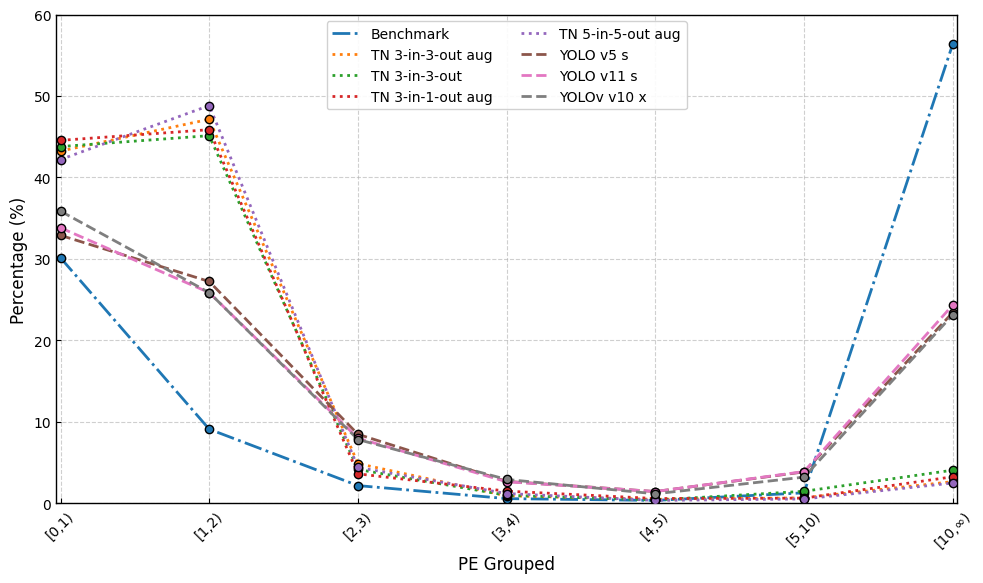

In [9]:
# Extract data from the DataFrame
models = PE_bins['Model']
pe_counts = PE_bins['PE Counts']
model_types = PE_bins['Model Type']

# Calculate percentage PE counts for each model
pe_counts_percentage = pe_counts.apply(lambda counts: np.array(counts) / sum(counts) * 100)

# Define the bin labels
bin_labels = ["[0,1)", "[1,2)", "[2,3)", "[3,4)", "[4,5)", "[5,10)", "[10,∞)"]

# Define line styles based on model types
line_styles = {"Benchmark": "dashdot", "TrackNet": "dotted", "YOLO": "dashed"}

# Plotting
plt.figure(figsize=(10, 6))
for i, percentages in enumerate(pe_counts_percentage):
    plt.plot(
        range(len(bin_labels)),
        percentages,
        color=d3_colors[i % len(d3_colors)],  # Cycle through the custom color palette
        linestyle=line_styles.get(model_types.iloc[i], 'solid'),  # Use the line style based on model type
        label=models.iloc[i],
        linewidth=2
    )
    # Add dots at each data point
    plt.scatter(
        range(len(bin_labels)),
        percentages,
        color=d3_colors[i % len(d3_colors)],
        edgecolor='black',  # Add contrast with a border
        zorder=3  # Ensure dots are above grid
    )

#set xlim
plt.xlim(-0.03, 6.03)
#ylim
plt.ylim(0, 60)
plt.xticks(ticks=range(len(bin_labels)), labels=bin_labels, rotation=45)
plt.xlabel("PE Grouped")
plt.ylabel("Percentage (%)")
plt.legend(loc='upper center', fontsize='small', ncol=2)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Visibility classes

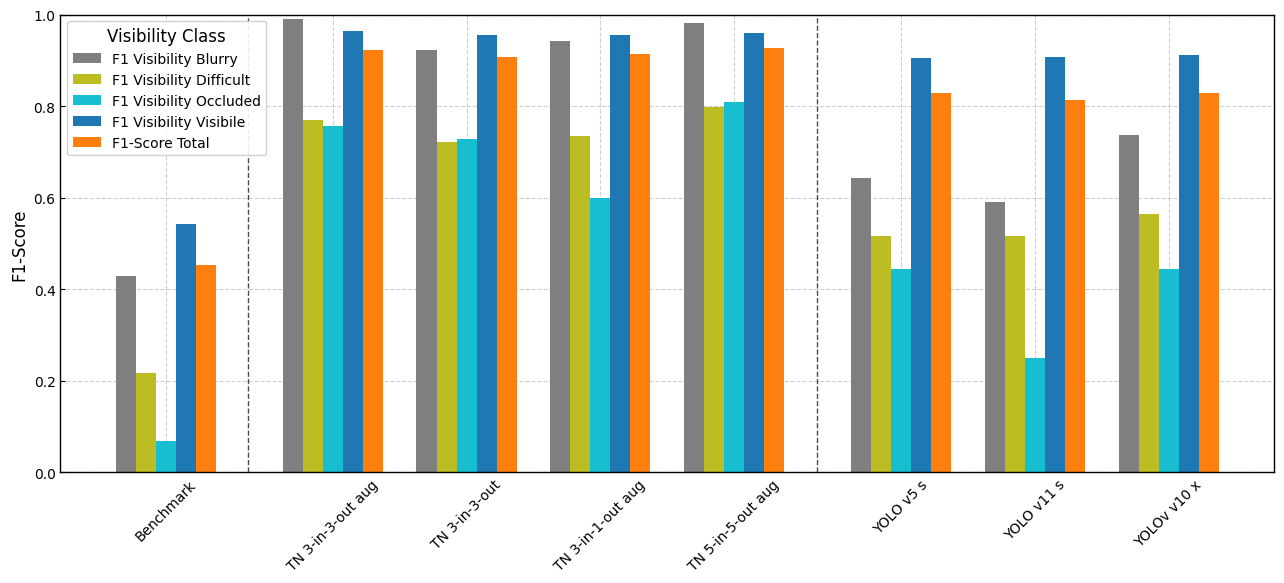

In [10]:
# Define the visibility classes to plot, including total F1-Score
visibility_classes = [
    "F1 Visibility Blurry",
    "F1 Visibility Difficult",
    "F1 Visibility Occluded",
    "F1 Visibility Visibile",
    "F1-Score Total"
]

# Extract models and data for the visibility classes
models = results_selected["Model"]
performance_data = results_selected[visibility_classes]

# Define custom group positions with fixed gaps between model types
model_groups = [
    0,  # Benchmark (index starts)
    1,  # TN models start
    5   # YOLO models start
]
gaps = [0, 0.25, 0.5]  # Fixed gaps between groups
x_positions = np.arange(len(models)) + np.repeat(gaps, np.diff(model_groups + [len(models)]))

width = 0.15  # Bar width to fit all classes

# Plotting
plt.figure(figsize=(13, 6))
for i, visibility_class in enumerate(visibility_classes):
    plt.bar(
        x_positions + i * width, 
        performance_data[visibility_class], 
        width=width, 
        color=d3_colors[(i + 7) % len(d3_colors)], 
        label=visibility_class
    )

# Add vertical separation lines between model types
for separator in model_groups[1:]:  # Skip the first group as it starts at 0
    if separator == model_groups[-1]:
        x_sep = x_positions[-1] -2.3333
    else:
        x_sep = x_positions[separator] - 0.3333  # Adjust line position for clarity
    plt.axvline(
        x=x_sep, 
        color='black', 
        linestyle='--', 
        linewidth=1, 
        alpha=0.7
    )

# Customize the plot
plt.xticks(x_positions + width * (len(visibility_classes) - 1) / 2, models, rotation=45)
plt.ylim(0, 1)  # Ensure y-axis covers the F1-Score range
plt.ylabel("F1-Score")
plt.legend(title="Visibility Class", loc="upper left")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


### Datasets

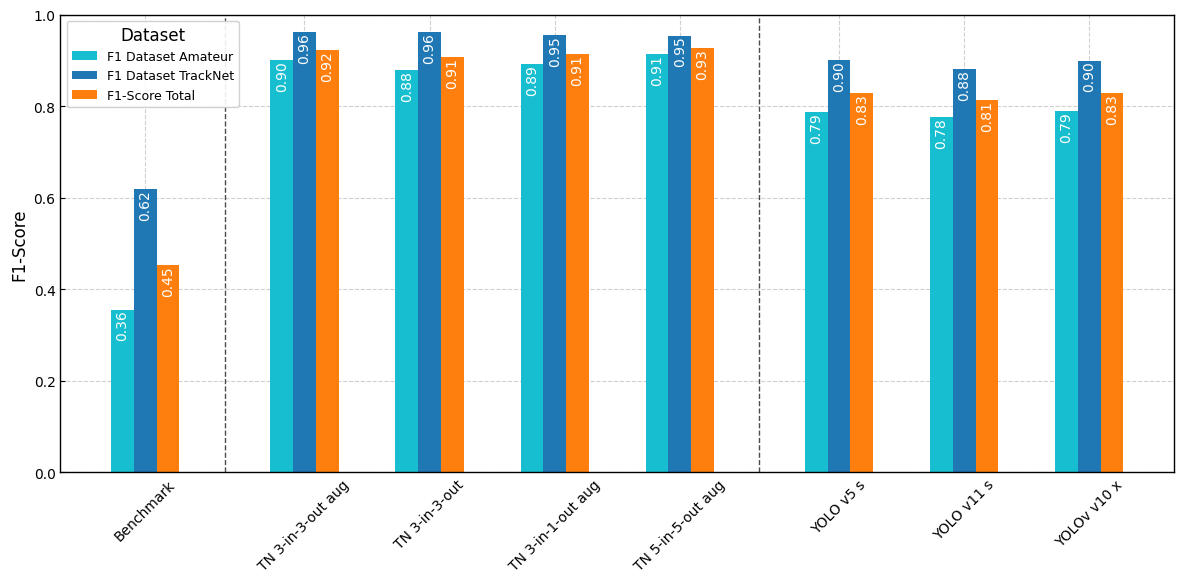

In [17]:
# Define the visibility classes to plot, including total F1-Score
datasets = [
    "F1 Dataset Amateur",
    "F1 Dataset TrackNet",
    "F1-Score Total"
]

#rename F1 Dataset New to F1 Dataset Amateur
results_selected = results_selected.rename(columns={'F1 Dataset New': 'F1 Dataset Amateur'})

# Extract models and data for the visibility classes
models = results_selected["Model"]
performance_data = results_selected[datasets]

# Define custom group positions with fixed gaps between model types
model_groups = [
    0,  # Benchmark (index starts)
    1,  # TN models start
    5   # YOLO models start
]
gaps = [0, 0.3, 0.3]  # Fixed gaps between groups

small_gap = 0.1  # Small gap between models within each group
x_positions = []

# Calculate x positions with small gaps
current_position = 0
for i in range(len(models)):
    x_positions.append(current_position)
    current_position += 1 + small_gap  # Add small gap for each model
    if i + 1 in model_groups[1:]:  # Add group gap at the end of a group
        current_position += gaps[model_groups.index(i + 1)]

x_positions = np.array(x_positions)  # Convert to NumPy array for easy manipulation

width = 0.2 # Bar width to fit all classes

# Plotting
plt.figure(figsize=(12, 6))
bars = []
for i, dataset in enumerate(datasets):
    bars.append(
        plt.bar(
            x_positions + i * width, 
            performance_data[dataset], 
            width=width, 
            color=d3_colors[(i + 9) % len(d3_colors)], 
            label=dataset
        )
    )

# Add absolute values as labels on top or inside each bar with 90-degree rotation
for bar_group, dataset in zip(bars, datasets):
    for bar, value in zip(bar_group, performance_data[dataset]):
        if pd.notna(value):
            if value > 0.2:  # Threshold for placing the label inside or above the bar
                va_position = 'top'
                color = 'white'
                height = bar.get_height()
            else:
                va_position = 'bottom'
                color = 'black'
                height = bar.get_height() + 0.02

            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{value:.2f}',
                ha='center', va=va_position, fontsize=10, color=color, rotation=90
            )

# Add vertical separation lines between model types
for separator in model_groups[1:]:  # Skip the first group as it starts at 0
    if separator == model_groups[-1]:
        x_sep = x_positions[-1] -2.7
    else:
        x_sep = x_positions[separator] - 0.5  # Adjust line position for clarity
    plt.axvline(
        x=x_sep, 
        color='black', 
        linestyle='--', 
        linewidth=1, 
        alpha=0.7
    )

# Customize the plot
plt.xticks(x_positions + width * (len(datasets) - 1) / 2, models, rotation=45)
plt.ylim(0, 1)  # Ensure y-axis covers the F1-Score range
plt.ylabel("F1-Score")
plt.legend(title="Dataset", loc="upper left", fontsize=9)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()
